In [49]:
import pandas as pd

In [50]:
store_df = pd.read_csv('store.csv')
df = pd.read_csv('train.csv')

C:\Users\Tyrone\AppData\Local\Temp\ipykernel_13968\305629052.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [51]:
merged_df = pd.merge(df, store_df, on='Store', how='left')

In [52]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [30]:
# Daten aus Date extrahieren (Jahr, Monat, Tag)
merged_df["Year"] = merged_df["Date"].str.slice(0, 4)
merged_df["Month"] = merged_df["Date"].str.slice(5, 7)
merged_df["Day"] = merged_df["Date"].str.slice(8, 10)
merged_df["Year"] = merged_df["Year"].astype("Int32")
merged_df["Month"] = merged_df["Month"].astype("Int32")
merged_df["Day"] = merged_df["Day"].astype("Int32")
merged_df.drop(columns=["Date"], inplace=True)

In [31]:
# Null Werte behandeln
merged_df["CompetitionDistance"].fillna(merged_df["CompetitionDistance"].mean(),inplace=True)
merged_df.fillna(-1, inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

# Fehlschlag: Ohne die folgenden Zeilen schlägt das kodieren fehl, weil die Datentypen innerhalb einer oder mehrerer Spalten uneinheitlich sind
merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(str)
merged_df["StoreType"] = merged_df["StoreType"].astype(str)
merged_df["Assortment"] = merged_df["Assortment"].astype(str)
merged_df["PromoInterval"] = merged_df["PromoInterval"].astype(str)


columns_to_encode = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

label_encoder = LabelEncoder()

for column in columns_to_encode:   
    merged_df[column] = label_encoder.fit_transform(merged_df[column])



In [33]:
merged_df.isna().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

In [34]:
merged_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,-1.0,-1.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2,2015,7,31
2,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2,2015,7,31
3,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,-1.0,-1.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,-1.0,-1.0,0,2015,7,31


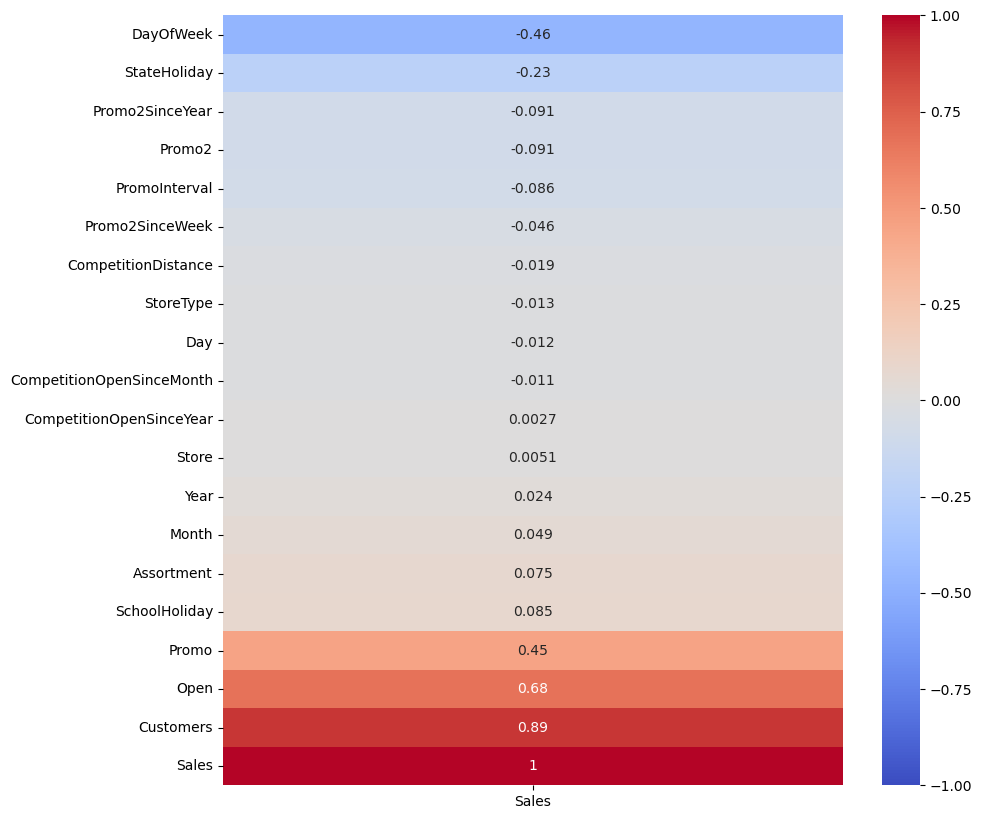

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr()[['Sales']].sort_values('Sales'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [36]:
# CompetitionOpenSinceMonth und CompetitionOpenSinceYear haben beide viele Null Werte und scheinen eher irrelevant, weshalb wir sie rauswerfen
merged_df.drop(columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace=True)

### Modelle

In [37]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = merged_df.drop('Sales', axis=1)
y = merged_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sample = X_train[:100000]
y_train_sample = y_train[:100000]
X_test_sample = X_test[:100000]
y_test_sample = y_test[:100000]

##### KNN

In [38]:
def KNN(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsRegressor

    knn = KNeighborsRegressor(n_neighbors=9, weights="distance", n_jobs=-1)
    knn.fit(X_train, y_train)
    return knn
    y_pred = knn.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# KNN(X_train, X_test, y_train, y_test)

##### Decision Tree

In [39]:
def DT(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor

    dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=12, min_samples_split=2,splitter="best", random_state=42)
    dt.fit(X_train, y_train)
    return dt
    y_pred = dt.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# DT(X_train, X_test, y_train, y_test)

##### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
def RF(X_train, X_test, y_train, y_test):

    rf = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1)
    rf.fit(X_train, y_train)
    return rf
    y_pred = rf.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# RF(X_train, X_test, y_train, y_test)

Accuracy: 0.96802
RMSE: 687.6703184243389


In [41]:
# Ada boost -> Performance ist nicht so gut, also nicht Teil des Votings
from sklearn.ensemble import AdaBoostRegressor
def Ada(X_train, X_test, y_train, y_test):
    ada = AdaBoostRegressor(random_state=42, n_estimators=300, learning_rate=0.01)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# Ada(X_train, X_test, y_train, y_test) lief bei meinem Rechner 10 Min 15 Sek

In [42]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
def GB(X_train, X_test, y_train, y_test):
    gb = GradientBoostingRegressor(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=8)
    gb.fit(X_train, y_train)
    return gb
    y_pred = gb.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# GB(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

In [43]:
# Support Vector machine
from sklearn.svm import SVR
def SVM(X_train, X_test, y_train, y_test):
    svr = SVR(kernel="rbf", C=1, epsilon=0.1)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# SVM(X_train_sample, X_test_sample, y_train_sample, y_test_sample)
# Ergebnis extrem schlecht, daher nicht weiter betrachtet

In [44]:
# Logistic Regression
from sklearn.linear_model import LinearRegression
def LR(X_train, X_test, y_train, y_test):
    lr = LinearRegression(n_jobs=-1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# LR(X_train, X_test, y_train, y_test)

### Voting

In [47]:
# Voting verfahren
from sklearn.ensemble import VotingRegressor
def VR(X_train, X_test, y_train, y_test):
    knn = KNN(X_train, X_test, y_train, y_test)
    dt = DT(X_train, X_test, y_train, y_test)
    rf = RF(X_train, X_test, y_train, y_test)
    gb = GB(X_train, X_test, y_train, y_test)

    vr = VotingRegressor(estimators=[('knn', knn), ('dt', dt), ('rf', rf), ('gb', gb)])
    vr.fit(X_train, y_train)
    y_pred = vr.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

VR(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

Accuracy: 0.97670
RMSE: 586.9968321380467
